### Lab 4 - IA


In [260]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn as sk
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

#### Task 1.1:
- Leer CSV
- Almacenarlo en un numpy.array

In [261]:

#Lectura CSV
kc_houseData = pd.read_csv('kc_house_data.csv')

# CSV a np.array
kc_Array = kc_houseData.values

kc_houseData.head()






,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


#### Task 1.2
- Modelo polinomial que relacione variables de price y sqft living.


Para este inciso, primero se realizó directamente sobre un dataframe de pandas.
Luego, se realizó, como se solicitó, con un array de numpy.

Cabe destacar que se dejaron ambas versiones como método de verificación del proceso correcto.
La primera queda como prueba adicional de concepto del correcto funcionamiento y verificación de datos.

Finalmente, se realizó una regresión lineal polinómica como se solicitó en este inciso.



In [262]:
"""
PROCESO REALIZADO CON PANDAS DATAFRAME

Usado como verificación de los resultados obtenidos con numpy

"""

# Extracción de variables
sqft_living = kc_houseData["sqft_living"].values.reshape(-1,1)
price = kc_houseData["price"].values

# Modelo de regresión lineal
model1 = LinearRegression()

# Entrenamiento del modelo
model1.fit(sqft_living, price)

print("Coeficiente:", model1.coef_)
print("Intercepto:  ",model1.intercept_)


Coeficiente: [280.6235679]
Intercepto:   -43580.743094473146


In [263]:

"""
PROCESO REALIZADO CON NUMPY ARRAY
Según lo solicitado en el enunciado.
Se obtienen los mismos resultados que con pandas.
"""

# Extracción de variables
sqftliving = kc_Array[:, 5].reshape(-1,1)
price2 = kc_Array[:, 2]

# Modelo de regresión lineal
model = LinearRegression()

# Entrenamiento del modelo
model.fit(sqftliving, price2)

print("Coeficiente:", model.coef_)
print("Intercepto:  ",model.intercept_)

Coeficiente: [280.6235679]
Intercepto:   -43580.743094473146


In [264]:
# Selección de variables
sqftliving_poly = kc_Array[:, 5].reshape(-1,1)
price_poly = kc_Array[:, 2]

X_train, X_test, y_train, y_test = train_test_split(sqft_living, price_poly, test_size=0.20, random_state=42)

# Matriz polinomial de segundo grado
sqftPoli = np.ones((X_train.shape[0], 1))
for i in range(1, 3):
    sqftPoli = np.concatenate((sqftPoli, X_train**i), axis=1)

sqftPolix = np.ones((X_test.shape[0], 1))
for i in range(1, 3):
    sqftPolix = np.concatenate((sqftPolix, X_test**i), axis=1)

# XTX y XTY
X_transpose = sqftPoli.T
XTX = X_transpose.dot(sqftPoli).astype('float64')
XTY = X_transpose.dot(y_train).astype('float64')

X_transposex = sqftPolix.T
XTXX = X_transposex.dot(sqftPolix).astype('float64')
XTYX = X_transposex.dot(y_test).astype('float64')

# Coeficientes beta
beta = np.linalg.solve(XTXX, XTYX)
betax = np.linalg.solve(XTXX, XTYX)

# Cálculo de la pérdida al cuadrado
y_pred = sqftPoli.dot(beta)
perdida = np.mean((y_train - y_pred)**2)
y_predx = sqftPolix.dot(betax)
perdidax = np.mean((y_test - y_predx)**2)
print('Pérdida:', np.mean((y_train - y_pred)**2))

# Cálculo de w0 y w1
w0 = beta[0]
w1 = beta[1] + 2*beta[2]*X_train.mean()
print('w0:', w0)
print('w1:', w1)

Pérdida: 62161461426.36041
w0: 73136.92459889458
w1: 253.78251928086388


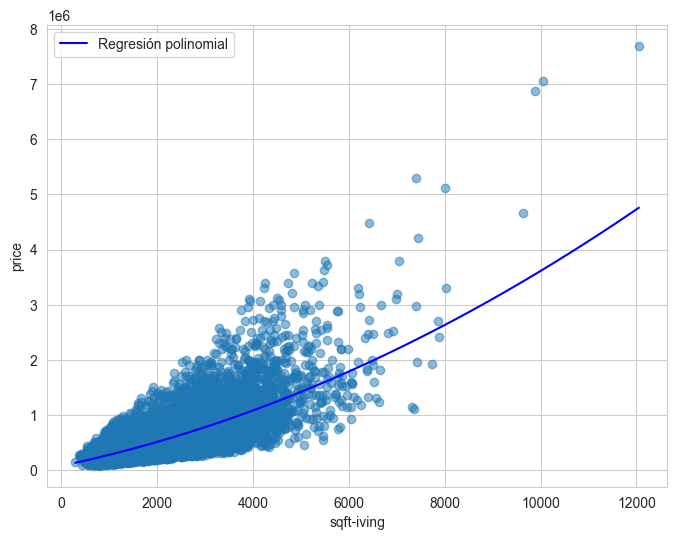

In [265]:
# Gráfico de datos y predicciones
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.5)
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_range = beta[0] + beta[1]*x_range + beta[2]*x_range**2
plt.plot(x_range, y_range, color='b', label='Regresión polinomial')
plt.legend()
plt.xlabel('sqft-iving')
plt.ylabel('price')
plt.show()

#### Task 1.3
- Implementación vectorial del algoritmo de regresión lineal

In [266]:
#Función de gradiente.

def gradiente(xs, ys, y_range): 

    
    a_s = []
    b_s = []
    c_s = []
    
    
    
    for x,y,y_bar in list(zip(xs, ys, y_range)):    
        x_squared = x**2
        partial_a = x_squared * (y - y_bar)
        a_s.append(partial_a)
        partial_b = x * (y-y_bar)
        b_s.append(partial_b)
        partial_c = (y-y_bar)
        c_s.append(partial_c)
    

    num = [i for i in y_range]
    n = len(num)
    
    gradient_a = (-2 / n) * sum(a_s)
    gradient_b = (-2 / n) * sum(b_s)
    gradient_c = (-2 / n) * sum(c_s)
    return(gradient_a, gradient_b, gradient_c)  

print(w,b,l)

In [267]:
#Vuelta con la derivada de los datos.
def epoch(x_range,y, y_range):
    lr = 0.00000000000000000000001
    b0_new = 0
    b1_new = 0
    b2_new = 0 
    for i in range(100):
        y_range = beta[0] + beta[1]*x_range + beta[2]*x_range**2
        calc_grad = gradiente(x_range, y, y_range)
        b0_new = beta[0] - lr * calc_grad[0]
        b1_new = beta[1] - lr * calc_grad[1]
        b2_new = beta[2] - lr * calc_grad[2]
        beta[0] = b0_new
        beta[1] = b1_new
        beta[2] = b2_new
    return b0_new, b1_new, b2_new
new_beta = epoch(X_train, y_train, y_range)

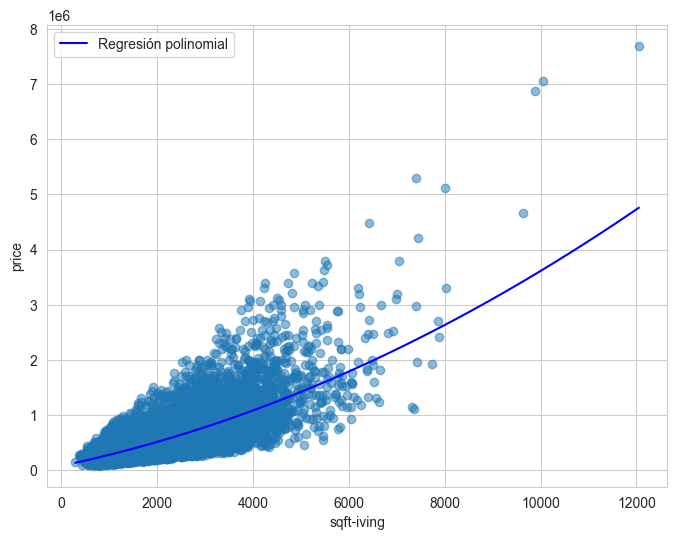

In [268]:
#Gráfica con los datos de entrenamiento
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, alpha=0.5)
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_range = new_beta[0][0] + new_beta[1][0]*x_range + new_beta[2][0]*x_range**2
plt.plot(x_range, y_range, color='b', label='Regresión polinomial')
plt.legend()
plt.xlabel('sqft-iving')
plt.ylabel('price')
plt.show()

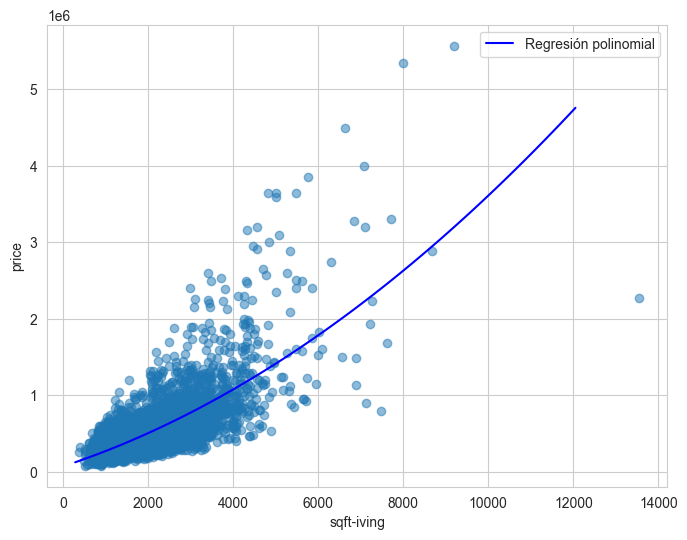

In [270]:
#Válidación con los datos de prueba
x_range = np.linspace(X_test.min(), X_test.max(), 100)
y_range = betax[0] + betax[1]*x_range + betax[2]*x_range**2
new_beta = epoch(X_test, y_test, y_range)
sns.set_style('whitegrid')
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, alpha=0.5)
x_range = np.linspace(X_train.min(), X_train.max(), 100)
y_range = new_beta[0][0] + new_beta[1][0]*x_range + new_beta[2][0]*x_range**2
plt.plot(x_range, y_range, color='b', label='Regresión polinomial')
plt.legend()
plt.xlabel('sqft-iving')
plt.ylabel('price')
plt.show()

#### Task 1.4
- Cross-validation del grado del polinomio que mejor describe la nube de puntos

#### Task 1.5
- Análisis de hallazgos:

    - 1.
    - 2.
    - 3.